In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\CUB\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
file_path = 'C:/Users/CUB/Downloads/Regulatory Affairs of Road Accident Data 2020 India.csv'

In [3]:
df = pd.read_csv(file_path)

In [4]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
  Million Plus Cities   Cause category        Cause Subcategory  \
0                Agra  Traffic Control  Flashing Signal/Blinker   
1                Agra  Traffic Control  Flashing Signal/Blinker   
2                Agra  Traffic Control  Flashing Signal/Blinker   
3                Agra  Traffic Control  Flashing Signal/Blinker   
4                Agra  Traffic Control  Flashing Signal/Blinker   

         Outcome of Incident  Count  
0         Greviously Injured    0.0  
1               Minor Injury    0.0  
2             Persons Killed    0.0  
3              Total Injured    0.0  
4  Total number of Accidents    0.0  


In [5]:
print("Last 5 rows of the dataset:")
print(df.tail())

Last 5 rows of the dataset:
     Million Plus Cities Cause category Cause Subcategory  \
9545               Vizaq        Weather       Sunny/Clear   
9546               Vizaq        Weather       Sunny/Clear   
9547               Vizaq        Weather       Sunny/Clear   
9548               Vizaq        Weather       Sunny/Clear   
9549               Vizaq        Weather       Sunny/Clear   

            Outcome of Incident   Count  
9545         Greviously Injured   561.0  
9546               Minor Injury   252.0  
9547             Persons Killed   176.0  
9548  Total number of Accidents  1207.0  
9549              Total Injured   813.0  


In [6]:
print("\nBasic Information of the dataset: ")
print(df.info())


Basic Information of the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550 entries, 0 to 9549
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Million Plus Cities  9550 non-null   object 
 1   Cause category       9550 non-null   object 
 2   Cause Subcategory    9550 non-null   object 
 3   Outcome of Incident  9550 non-null   object 
 4   Count                9547 non-null   float64
dtypes: float64(1), object(4)
memory usage: 373.2+ KB
None


In [7]:
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
       Million Plus Cities Cause category Cause Subcategory  \
count                 9550           9550              9550   
unique                  50              6                35   
top                   Agra  Road Features            Others   
freq                   191           2000              1450   
mean                   NaN            NaN               NaN   
std                    NaN            NaN               NaN   
min                    NaN            NaN               NaN   
25%                    NaN            NaN               NaN   
50%                    NaN            NaN               NaN   
75%                    NaN            NaN               NaN   
max                    NaN            NaN               NaN   

       Outcome of Incident        Count  
count                 9550  9547.000000  
unique                   5          NaN  
top     Greviously Injured          NaN  
freq                  2000          NaN  
mean        

In [8]:
print("\nMissing Values: ")
print(df.isnull().sum())


Missing Values: 
Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  3
dtype: int64


In [9]:
df_cleaned = df.dropna(subset=['Count'])

In [10]:
print("\nNumber of null values after cleaning:")
print(df_cleaned.isnull().sum())


Number of null values after cleaning:
Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  0
dtype: int64


In [12]:
df.shape

(9550, 5)

In [39]:
def plot_categorical_distribution(column_name):
    plt.figure(figsize=(8, 3))
    sns.countplot(data=df, x=column_name, order=df[column_name].value_counts().index)
    plt.title(f'Distribution of {column_name}')
    plt.xticks(rotation=90, fontsize=5)
    plt.show()

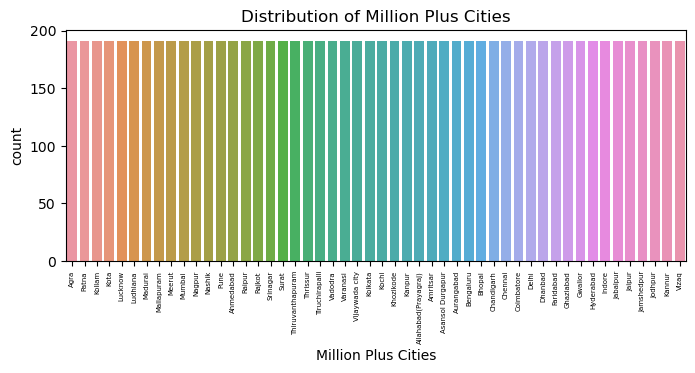

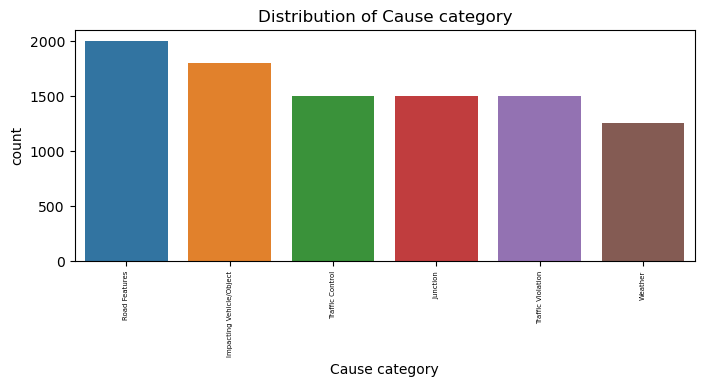

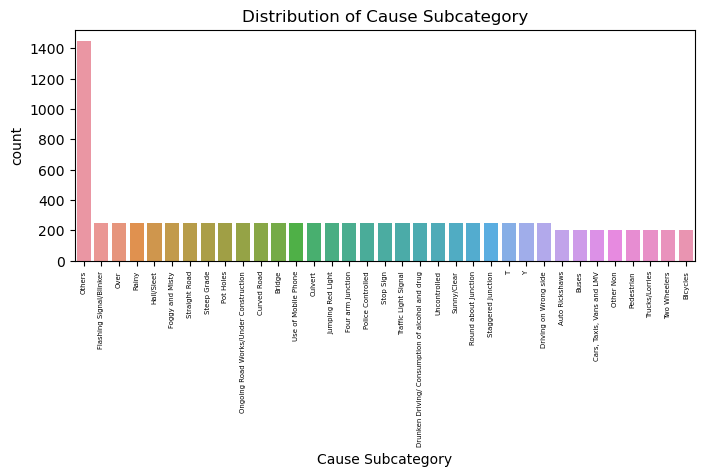

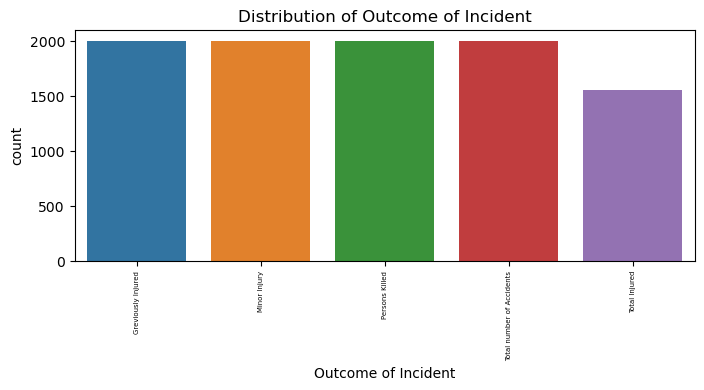

In [40]:
categorical_columns = ['Million Plus Cities', 'Cause category', 'Cause Subcategory', 'Outcome of Incident']
for col in categorical_columns:
    plot_categorical_distribution(col)

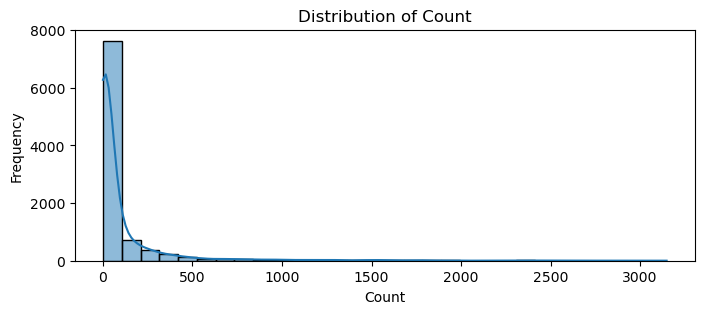

In [41]:
plt.figure(figsize=(8, 3))
sns.histplot(df['Count'], bins=30, kde=True)
plt.title('Distribution of Count')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

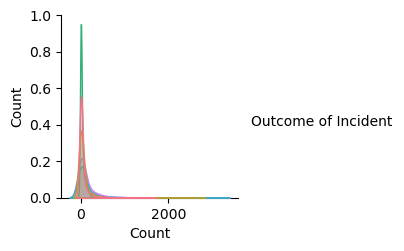

In [25]:
sns.pairplot(df, hue='Outcome of Incident', vars=['Count'], palette='husl')
plt.show()

In [35]:
def plot_relationship(column_name):
    plt.figure(figsize=(8, 3))
    sns.boxplot(data=df, x=column_name, y='Count')
    plt.title(f'Relationship between {column_name} and Count')
    plt.xticks(rotation=90)
    plt.show()

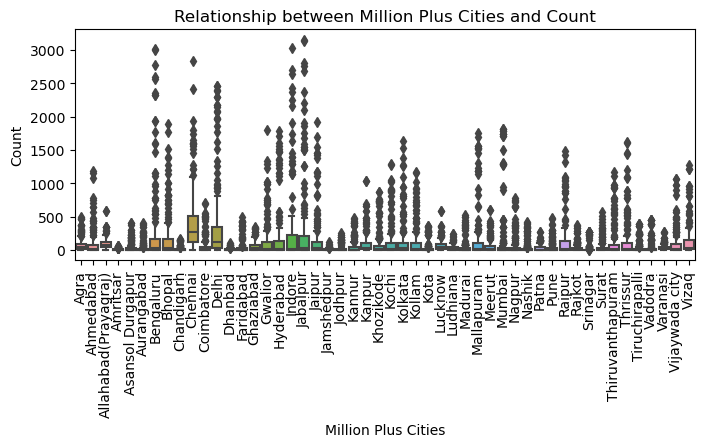

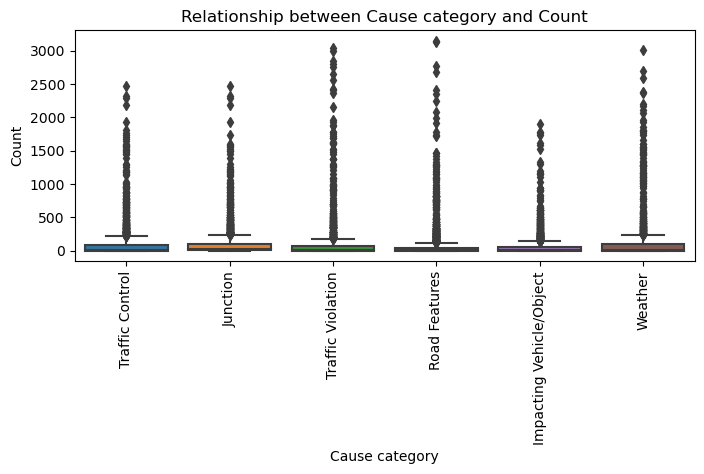

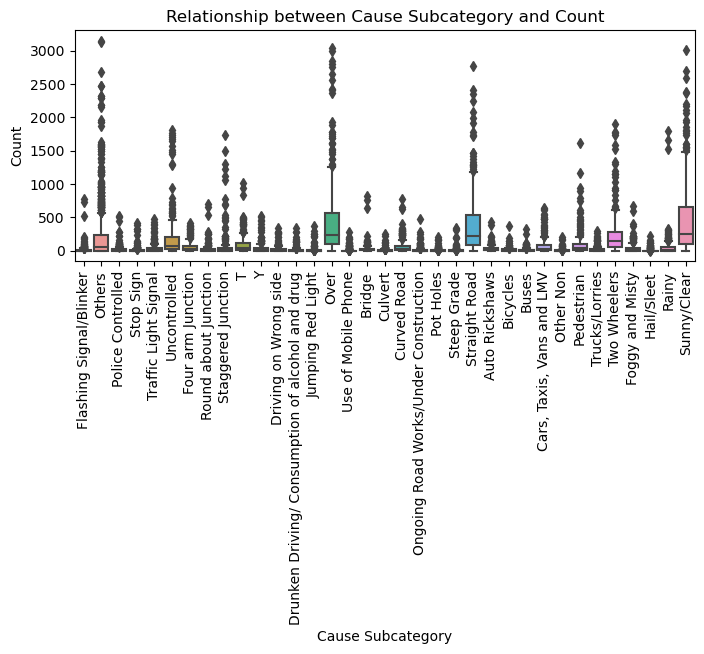

In [36]:
for col in categorical_columns:
    if col != 'Outcome of Incident':
        plot_relationship(col)

In [30]:
unique_cities = df['Million Plus Cities'].nunique()
print(f'\nNumber of unique cities: {unique_cities}')


Number of unique cities: 50


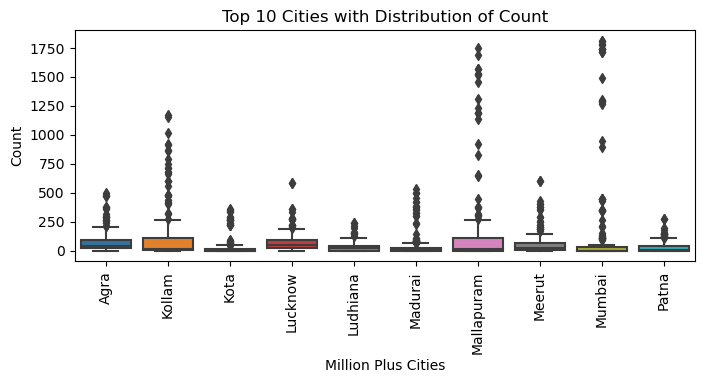

In [43]:
if unique_cities > 20:
    sample_cities = df['Million Plus Cities'].value_counts().nlargest(10).index
    df_sampled = df[df['Million Plus Cities'].isin(sample_cities)]
    plt.figure(figsize=(8, 3))
    sns.boxplot(data=df_sampled, x='Million Plus Cities', y='Count')
    plt.title('Top 10 Cities with Distribution of Count')
    plt.xticks(rotation=90)
    plt.show()